In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from sklearn.preprocessing import LabelEncoder
Labelencoder_X = LabelEncoder()s

    person_age: Age of the borrower.
    person_income: Annual income of the borrower.
    person_home_ownership: Home ownership status of the borrower.
    person_emp_length: Employment length of the borrower (in years).
    loan_intent: The purpose of the loan.
    loan_grade: The credit score assigned to the borrower.
    loan_amnt: The amount of the loan.
    loan_int_rate: The interest rate of the loan.
    loan_percent_income: The percentage of income used to pay off the loan.
    cb_person_default_on_file: Whether the borrower has a history of defaulting on loans.
    cb_person_cred_hist_length: The length of the borrower's credit history.

In [217]:
df=pd.read_csv('credit_risk_dataset.csv')

In [218]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [219]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


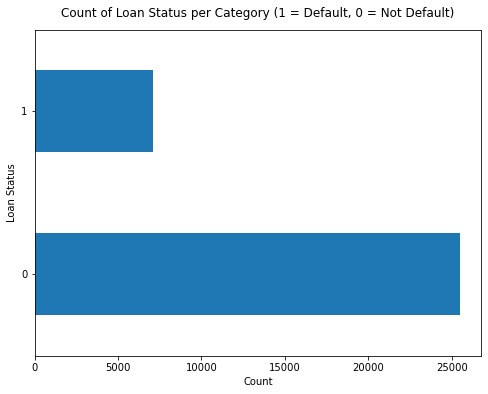

In [221]:
df['loan_status'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count")
plt.ylabel("Loan Status")
plt.title("Count of Loan Status per Category (1 = Default, 0 = Not Default)", y=1.02);

In [222]:
100*df['loan_status'].value_counts()/len(df['loan_status'])

0    78.183604
1    21.816396
Name: loan_status, dtype: float64

From the chart above, the data is not balanced, Label 0 = 78% & Label 1 = 22%. Let's analyze other features.

In [223]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [224]:
df[df['person_emp_length'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


<AxesSubplot:>

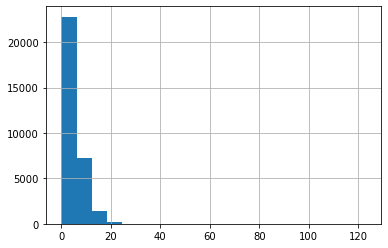

In [225]:
df['person_emp_length'].hist(bins=20)

In [226]:
895/31686*100

2.82459130215237

because "person_emp_length" has NaN values and there is no pattern from it, also the number of NaN values is relatively small, which is 2,8% from the total, so we drop it.

In [227]:
df[df['loan_int_rate'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [228]:
3116/29465*100

10.575258781605294

<AxesSubplot:>

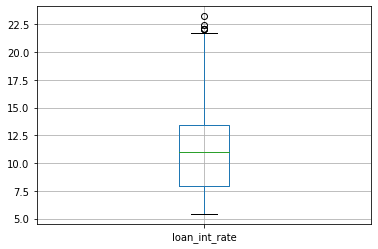

In [229]:
df.boxplot(column='loan_int_rate')

<AxesSubplot:>

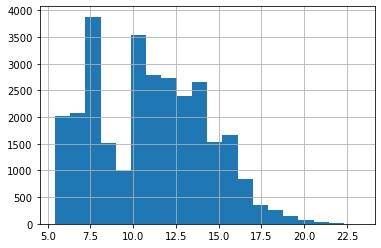

In [230]:
df['loan_int_rate'].hist(bins=20)

because 'loan_int_rate' has lots of NaN & the pattern is random, so it's more appropriate to fill with median 

In [231]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(),inplace=True)
df.dropna(subset=['person_emp_length'], inplace=True)

<AxesSubplot:>

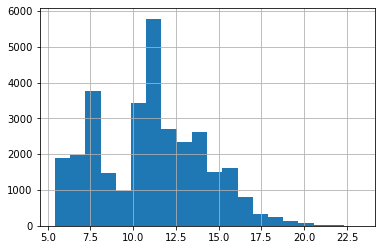

In [232]:
df['loan_int_rate'].hist(bins=20)

<AxesSubplot:>

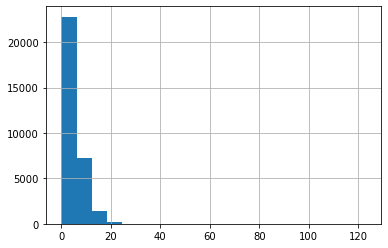

In [233]:
df['person_emp_length'].hist(bins=20)

In [234]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

<AxesSubplot:>

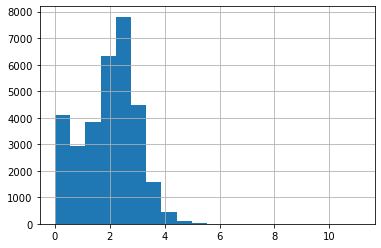

In [235]:
df['person_emp_length_sqrt'] = np.sqrt(df['person_emp_length'])

# visualize the transformed data
df['person_emp_length_sqrt'].hist(bins=20)

In [236]:
df['loan_int_rate_log'] = np.log(np.array(df['loan_int_rate']))

<AxesSubplot:>

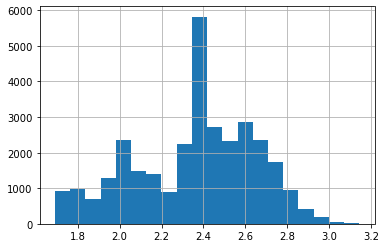

In [237]:
df['loan_int_rate_log'].hist(bins=20)

<AxesSubplot:>

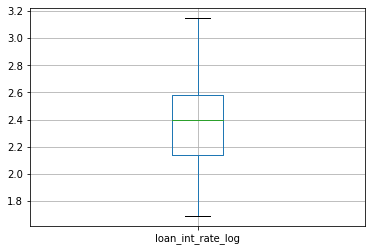

In [238]:
df.boxplot(column='loan_int_rate_log')

In [239]:
from scipy.stats import boxcox
df['loan_int_rate_boxcox'], lambda_boxcox = boxcox(df['loan_int_rate_log'])

<AxesSubplot:xlabel='loan_int_rate_log', ylabel='Count'>

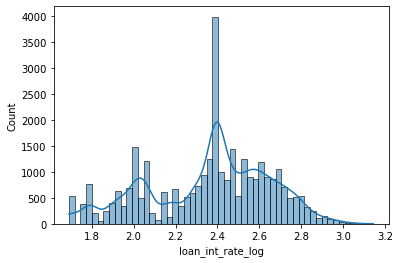

In [240]:
sns.histplot(df['loan_int_rate_log'], kde=True)

<AxesSubplot:xlabel='person_emp_length_sqrt', ylabel='Count'>

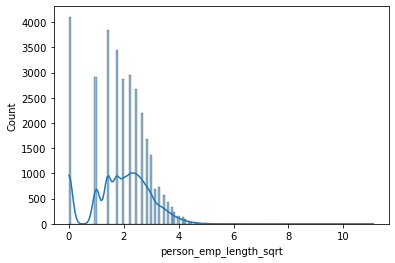

In [241]:
sns.histplot(df['person_emp_length_sqrt'], kde=True)

In [242]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length_sqrt,loan_int_rate_log,loan_int_rate_boxcox
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,11.090537,2.773838,3.917202
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,2.236068,2.410542,2.743372
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1.000000,2.554899,3.185583
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,2.000000,2.723267,3.741628
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,2.828427,2.658159,3.521425


In [243]:
df_new = df.drop(columns=['loan_int_rate_boxcox'])

In [244]:
df_new.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length_sqrt,loan_int_rate_log
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,11.090537,2.773838
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,2.236068,2.410542
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1.000000,2.554899
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,2.000000,2.723267
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,2.828427,2.658159


In [245]:
df_new.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
person_emp_length_sqrt        0
loan_int_rate_log             0
dtype: int64

In [246]:
df_new.iloc[:,2] = Labelencoder_X.fit_transform(df_new.iloc[:,2])
df_new.iloc[:,4] = Labelencoder_X.fit_transform(df_new.iloc[:,4])
df_new.iloc[:,5] = Labelencoder_X.fit_transform(df_new.iloc[:,5])
df_new.iloc[:,10] = Labelencoder_X.fit_transform(df_new.iloc[:,10])

In [247]:
unique_data = df_new['person_home_ownership'].unique()
print(unique_data)

[3 2 0 1]


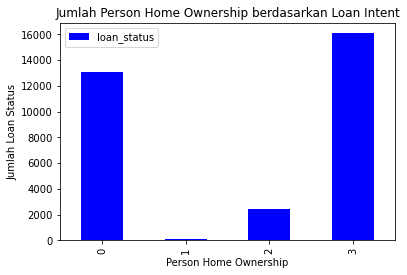

In [248]:
# Buat pivot table untuk menghitung jumlah loan_status untuk setiap loan_intent
table = pd.pivot_table(df_new, values='loan_status', index='person_home_ownership', aggfunc=len)

# Buat bar plot
table.plot(kind='bar', color='blue')

# Tambahkan judul dan label pada sumbu x dan y
plt.title('Jumlah Loan Status berdasarkan ')
plt.xlabel('Person Home Ownership')
plt.ylabel('Jumlah Loan Status')

# Tampilkan plot
plt.show()

In [249]:
import pandas as pd
from scipy.stats import pearsonr


# Encoding variabel kategorikal
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['person_home_ownership_encoded'] = le.fit_transform(df_new['person_home_ownership'])

# Hitung korelasi Pearson antara variabel encoded dan target
corr, p_value = pearsonr(df_new['person_home_ownership_encoded'], df_new['loan_status'])

# Tampilkan hasil
print("Korelasi Pearson: {:.3f}".format(corr))
print("P-value: {:.3f}".format(p_value))

Korelasi Pearson: 0.209
P-value: 0.000


In [250]:
df_new.corr()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length_sqrt,loan_int_rate_log,person_home_ownership_encoded
person_age,1.000000,0.174755,-0.033704,0.163106,0.036171,0.013033,0.051180,0.010347,-0.023054,-0.041183,0.005173,0.858829,0.102069,0.009890,-0.033704
person_income,0.174755,1.000000,-0.202617,0.134268,0.002087,-0.002998,0.263639,-0.001322,-0.140411,-0.252967,-0.004456,0.119007,0.123981,-0.003052,-0.202617
person_home_ownership,-0.033704,-0.202617,1.000000,-0.231736,0.009230,0.117512,-0.131022,0.130421,0.208826,0.140288,0.060529,-0.026298,-0.235546,0.139508,1.000000
person_emp_length,0.163106,0.134268,-0.231736,1.000000,0.021749,-0.047276,0.113082,-0.053782,-0.082489,-0.054111,-0.027728,0.144699,0.925979,-0.061544,-0.231736
loan_intent,0.036171,0.002087,0.009230,0.021749,1.000000,-0.008963,-0.003670,-0.002419,-0.065484,0.001259,-0.005420,0.035754,0.016624,-0.001711,0.009230
loan_grade,0.013033,-0.002998,0.117512,-0.047276,-0.008963,1.000000,0.144643,0.889489,0.377022,0.125304,0.536610,0.013909,-0.049560,0.849687,0.117512
loan_amnt,0.051180,0.263639,-0.131022,0.113082,-0.003670,0.144643,1.000000,0.138553,0.112326,0.577200,0.038978,0.042398,0.113007,0.135520,-0.131022
loan_int_rate,0.010347,-0.001322,0.130421,-0.053782,-0.002419,0.889489,0.138553,1.000000,0.323290,0.117497,0.476167,0.014476,-0.054249,0.985986,0.130421
loan_status,-0.023054,-0.140411,0.208826,-0.082489,-0.065484,0.377022,0.112326,0.323290,1.000000,0.379944,0.181233,-0.016889,-0.094244,0.297893,0.208826
loan_percent_income,-0.041183,-0.252967,0.140288,-0.054111,0.001259,0.125304,0.577200,0.117497,0.379944,1.000000,0.036528,-0.030934,-0.050473,0.120388,0.140288


In [251]:
unique_data = df_new['loan_intent'].unique()
print(unique_data)

[4 1 3 5 2 0]


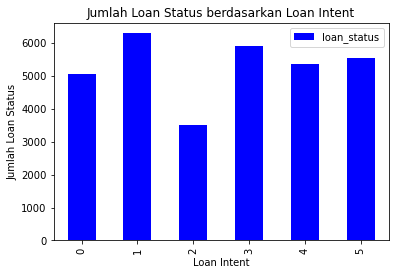

In [252]:
# Buat pivot table untuk menghitung jumlah loan_status untuk setiap loan_intent
table = pd.pivot_table(df_new, values='loan_status', index='loan_intent', aggfunc=len)

# Buat bar plot
table.plot(kind='bar', color='blue')

# Tambahkan judul dan label pada sumbu x dan y
plt.title('Jumlah Loan Status berdasarkan Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Jumlah Loan Status')

# Tampilkan plot
plt.show()

In [253]:
unique_data = df_new['loan_grade'].unique()
print(unique_data)

[3 1 2 0 4 5 6]


In [254]:
df_new['loan_grade'].value_counts()

0    10371
1    10186
2     6321
3     3556
4      952
5      236
6       64
Name: loan_grade, dtype: int64

In [255]:
df_new['loan_grade'].replace([5, 6], 4, inplace=True)


In [256]:
unique_data = df_new['loan_percent_income'].unique()
print(unique_data)

[0.59 0.1  0.57 0.53 0.55 0.25 0.45 0.44 0.42 0.16 0.41 0.37 0.32 0.3
 0.06 0.29 0.31 0.22 0.52 0.14 0.49 0.13 0.5  0.35 0.17 0.27 0.33 0.08
 0.03 0.21 0.63 0.47 0.4  0.07 0.38 0.34 0.04 0.23 0.15 0.11 0.43 0.51
 0.02 0.28 0.26 0.19 0.39 0.09 0.05 0.61 0.18 0.6  0.01 0.48 0.12 0.54
 0.56 0.46 0.36 0.24 0.2  0.72 0.64 0.69 0.77 0.83 0.65 0.67 0.58 0.71
 0.68 0.7  0.66 0.   0.76 0.62 0.78]


In [257]:
unique_data = df_new['loan_status'].unique()
print(unique_data)


[1 0]


In [258]:
unique_data = df_new['cb_person_default_on_file'].unique()
print(unique_data)

[1 0]


In [259]:
X = df_new.iloc[1:]

In [260]:
X.drop(columns='loan_status', inplace=True)

In [261]:
X.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_emp_length_sqrt',
       'loan_int_rate_log', 'person_home_ownership_encoded'],
      dtype='object')

In [262]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31685 entries, 1 to 32580
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     31685 non-null  int64  
 1   person_income                  31685 non-null  int64  
 2   person_home_ownership          31685 non-null  int32  
 3   person_emp_length              31685 non-null  float64
 4   loan_intent                    31685 non-null  int32  
 5   loan_grade                     31685 non-null  int32  
 6   loan_amnt                      31685 non-null  int64  
 7   loan_int_rate                  31685 non-null  float64
 8   loan_percent_income            31685 non-null  float64
 9   cb_person_default_on_file      31685 non-null  int32  
 10  cb_person_cred_hist_length     31685 non-null  int64  
 11  person_emp_length_sqrt         31685 non-null  float64
 12  loan_int_rate_log              31685 non-null 

In [263]:
X.drop(columns=['person_age'], inplace=True)

In [264]:
X.columns

Index(['person_income', 'person_home_ownership', 'person_emp_length',
       'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_emp_length_sqrt',
       'loan_int_rate_log', 'person_home_ownership_encoded'],
      dtype='object')

In [265]:
X.drop(columns='person_home_ownership', inplace=True)
X.drop(columns='person_emp_length', inplace=True)
X.drop(columns='loan_int_rate', inplace=True)

In [266]:
X.columns

Index(['person_income', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_emp_length_sqrt',
       'loan_int_rate_log', 'person_home_ownership_encoded'],
      dtype='object')

In [267]:
y = df_new.iloc[:,8]

In [268]:
X

,person_income,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length_sqrt,loan_int_rate_log,person_home_ownership_encoded
1,9600,1,1,1000,0.10,0,2,2.236068,2.410542,2
2,9600,3,2,5500,0.57,0,3,1.000000,2.554899,0
3,65500,3,2,35000,0.53,0,2,2.000000,2.723267,3
4,54400,3,2,35000,0.55,1,4,2.828427,2.658159,3
5,9900,5,0,2500,0.25,0,2,1.414214,1.965713,2
...,...,...,...,...,...,...,...,...,...,...
32576,53000,4,2,5800,0.11,0,30,1.000000,2.577182,0
32577,120000,4,0,17625,0.15,0,19,2.000000,2.013569,0
32578,76000,2,1,35000,0.46,0,28,1.732051,2.396986,3
32579,150000,4,1,15000,0.10,0,26,2.236068,2.440606,0


In [269]:
y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 31686, dtype: int64

In [270]:
y.drop(0,inplace=True)

In [271]:
y

1        0
2        1
3        1
4        1
5        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 31685, dtype: int64

In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [275]:
X_train.head()

,person_income,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length_sqrt,loan_int_rate_log,person_home_ownership_encoded
7267,74415,4,3,6350,0.09,1,3,1.000000,2.558776,3
19783,36000,1,1,1600,0.04,0,7,2.828427,2.359910,0
2483,15000,1,1,3000,0.20,0,3,1.732051,2.293544,3
28774,92004,3,1,10000,0.11,0,9,3.464102,2.264883,0
22860,21000,1,1,8000,0.38,0,7,1.414214,2.460443,3


In [278]:
set[X_train.iloc[:,2]]

set[7267     3
19783    1
2483     1
28774    1
22860    1
        ..
13529    0
20251    4
10184    2
11173    0
2853     0
Name: loan_grade, Length: 25348, dtype: int32]

In [279]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [338]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=42, max_depth=9)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

In [339]:
DTClassifier.score(X_train,y_train)

0.9325785071800536

In [340]:
y_pred=DTClassifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [341]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# assume y_true and y_pred are the true and predicted labels, respectively
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8751775287991163
Precision: 0.724669603524229
Recall: 0.7034925160370634
F1-score: 0.7139240506329113


In [335]:
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=5 )
DTClassifier.fit(X_train_resampled,y_train_resampled) 
y_pred=DTClassifier.predict(X_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7252643206564621
Precision: 0.8604992657856094
Recall: 0.4304076386338597
F1-score: 0.5738066095471236


In [336]:
DTClassifier.score(X_train_resampled,y_train_resampled)

0.8842058842058842

In [360]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print classification report
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8720214612592709
Precision: 0.7026431718061674
Recall: 0.7021276595744681
F1-score: 0.7023853211009174


In [361]:
clf.score(X_train,y_train)

0.9289095786649835

In [362]:
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print classification report
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6967019094208616
Precision: 0.8869309838472834
Recall: 0.40591397849462363
F1-score: 0.5569386814200091


In [363]:
clf.score(X_train_resampled,y_train_resampled)

0.912051912051912

In [364]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [365]:
y_pred=NBClassifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [366]:
precision = precision_score(y_pred, y_test)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8029035821366577
Precision: 0.6483113069016153
Recall: 0.6483113069016153
F1-score: 0.5857379767827529


In [367]:
NBClassifier.score(X_train,y_train)

0.7963941928357267

In [368]:
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
NBClassifier = GaussianNB()
NBClassifier.fit(X_train_resampled,y_train_resampled)

# Make predictions on the test set
y_pred=NBClassifier.predict(X_test)

# Print classification report
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7217926463626322
Precision: 0.7951541850220264
Recall: 0.4218932606155045
F1-score: 0.5512853143293459


In [369]:
NBClassifier.score(X_train_resampled,y_train_resampled)

0.8172053172053172